dataset link :https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data

#### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Variables:
RowNumber — corresponds to the record (row) number and has no effect on the output. This column will be removed.

CustomerId — contains random values and has no effect on customer leaving the bank. This column will be removed.

Surname — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography — a customer’s location can affect their decision to leave the bank. This column will be removed.

Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts — refers to the number of products that a customer has purchased through the bank.

HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

IsActiveMember — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

#### Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


It consists of 10000 observations and 12 variables. Independent variables contain information about customers. Dependent variable refers to customer abandonment status.

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No Null values in Given Dataset.

In [5]:
df.duplicated().sum()

0

 No duplicate values available

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### We can drop the features which we do not need in model building

In [7]:
df.drop(['Surname','Geography','Gender','CustomerId','RowNumber'],axis=1,inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


#### Visualization on Target Column

0    7963
1    2037
Name: Exited, dtype: int64


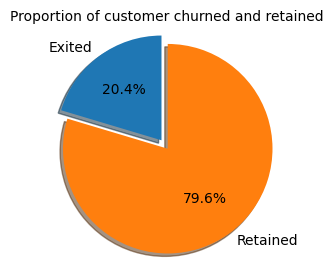

In [8]:
print(df.Exited.value_counts())
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 10)
plt.show()

From above observation, aproximate 80% (7063 nos.) customers are continue with the bank as a member

#### feature scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['CreditScore','Age','Balance','EstimatedSalary']] = sc.fit_transform(df[['CreditScore','Age','Balance','EstimatedSalary']])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0


#### making data balanced by Oversampling and Spliting dataset into x & y

In [10]:
from imblearn.over_sampling import SMOTE
sm =SMOTE(random_state=42)
x = df.drop('Exited', axis=1)
y = df['Exited']
x,y = sm.fit_resample(x,y)
x.shape,y.shape

((15926, 8), (15926,))

We use Scaling for standardization

<AxesSubplot: xlabel='Exited', ylabel='count'>

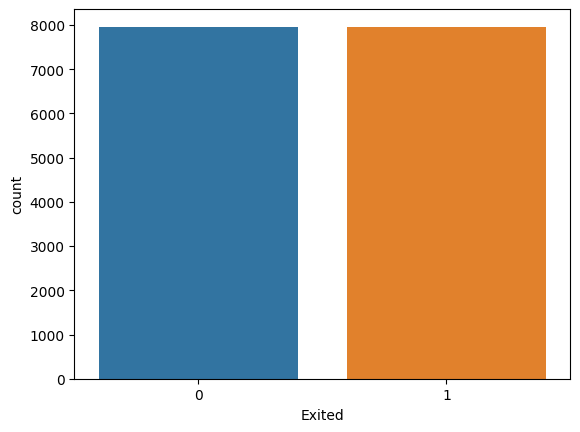

In [11]:
sns.countplot(x=y)

Now my Data is balanced as shown above graph

In [12]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276


#### Spliting x & y into training and testing

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.3,random_state=1)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score

In [15]:
logreg=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
dt=DecisionTreeClassifier()

In [16]:
def mymodel(model):
    model.fit(xtrain,ytrain) # build model
    ypred = model.predict(xtest) #predicted value of y
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    print(f'training accuracy {train}')
    print(f'testing accuracy {test}')
    print(f'Model Name : {model}')
    print(classification_report(ytest,ypred))

In [17]:
mymodel(logreg)

training accuracy 0.7030857552924291
testing accuracy 0.691084135621599
Model Name : LogisticRegression()
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      2322
           1       0.70      0.69      0.70      2456

    accuracy                           0.69      4778
   macro avg       0.69      0.69      0.69      4778
weighted avg       0.69      0.69      0.69      4778



In [18]:
mymodel(svm)

training accuracy 0.7704520990312164
testing accuracy 0.756802009208874
Model Name : SVC()
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      2322
           1       0.78      0.73      0.76      2456

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.76      0.76      0.76      4778



In [19]:
mymodel(knn)

training accuracy 0.8878722640832436
testing accuracy 0.8359146086228547
Model Name : KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      2322
           1       0.80      0.91      0.85      2456

    accuracy                           0.84      4778
   macro avg       0.84      0.83      0.83      4778
weighted avg       0.84      0.84      0.83      4778



In [20]:
mymodel(dt)

training accuracy 1.0
testing accuracy 0.8210548346588531
Model Name : DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      2322
           1       0.82      0.83      0.83      2456

    accuracy                           0.82      4778
   macro avg       0.82      0.82      0.82      4778
weighted avg       0.82      0.82      0.82      4778



#### Bagging

In [21]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(dt)
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
cr = classification_report(ytest,ypred)
train = bg.score(xtrain,ytrain)
test = bg.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(dt)
print(cr)

training accuracy 0.990043057050592
testing accuracy 0.8539137714524906
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2322
           1       0.89      0.82      0.85      2456

    accuracy                           0.85      4778
   macro avg       0.86      0.85      0.85      4778
weighted avg       0.86      0.85      0.85      4778



#### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
cr = classification_report(ytest,ypred)
train = rf.score(xtrain,ytrain)
test = rf.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(cr)

training accuracy 1.0
testing accuracy 0.8737965676015069
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2322
           1       0.88      0.87      0.88      2456

    accuracy                           0.87      4778
   macro avg       0.87      0.87      0.87      4778
weighted avg       0.87      0.87      0.87      4778



#### Voting Classifier

In [23]:
models=[]
models.append(('logistic regression',logreg))
models.append(('KNN',knn))
models.append(('Support vector machine',svm))
models.append(('Decision Tree',dt))

In [24]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=models)
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
cr = classification_report(ytest,ypred)
train = vc.score(xtrain,ytrain)
test = vc.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(cr)

training accuracy 0.8486724076067456
testing accuracy 0.7938467978233571
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      2322
           1       0.84      0.74      0.79      2456

    accuracy                           0.79      4778
   macro avg       0.80      0.80      0.79      4778
weighted avg       0.80      0.79      0.79      4778



#### Boosting

#### a. Adaptive Boosting

In [25]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(xtrain,ytrain)
ypred = ad.predict(xtest)
cr = classification_report(ytest,ypred)
train = ad.score(xtrain,ytrain)
test = ad.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(cr)

training accuracy 0.789199856476498
testing accuracy 0.7787777312683131
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      2322
           1       0.79      0.77      0.78      2456

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778



#### b. Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
ypred = gb.predict(xtest)
cr = classification_report(ytest,ypred)
train = gb.score(xtrain,ytrain)
test = gb.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(cr)

training accuracy 0.8273232866881952
testing accuracy 0.808915864378401
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      2322
           1       0.83      0.79      0.81      2456

    accuracy                           0.81      4778
   macro avg       0.81      0.81      0.81      4778
weighted avg       0.81      0.81      0.81      4778



#### c. Extreme Gradient Boosting

In [27]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(xtrain,ytrain)
ypred = xg.predict(xtest)
cr = classification_report(ytest,ypred)
train = xg.score(xtrain,ytrain)
test = xg.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(cr)

training accuracy 0.9540724793684966
testing accuracy 0.8890749267475931
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2322
           1       0.92      0.86      0.89      2456

    accuracy                           0.89      4778
   macro avg       0.89      0.89      0.89      4778
weighted avg       0.89      0.89      0.89      4778



My model work best on Random Forest i.e. accuracy 84% as compared to others. So we'll build our model on Random Forest.

#### Hyper Tunning using GridSearchCV

#### HyperTunning on Extreme Gradient Boosting

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
estimator = XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42)
parameters = {'max_depth': range (2, 10, 1),'n_estimators': range(60, 220, 40),'learning_rate': [0.1, 0.01, 0.05]}

In [29]:
gs = GridSearchCV(estimator=estimator,param_grid=parameters,scoring = 'roc_auc',n_jobs = 10,cv = 10,verbose=3)

In [30]:
gs.fit(xtrain,ytrain)
ypred = gs.predict(xtest)
cr = classification_report(ytest,ypred)
print(cr)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      2322
           1       0.91      0.86      0.89      2456

    accuracy                           0.89      4778
   macro avg       0.89      0.89      0.89      4778
weighted avg       0.89      0.89      0.89      4778



In [31]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180}

#### Rebuild using xgboost algorithm with best parameters

In [32]:
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate= 0.1, max_depth= 9, n_estimators= 180)
xg.fit(xtrain,ytrain)
ypred = xg.predict(xtest)
cr = classification_report(ytest,ypred)
train = xg.score(xtrain,ytrain)
test = xg.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(cr)

training accuracy 0.9777538571941156
testing accuracy 0.8874005860192549
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      2322
           1       0.91      0.86      0.89      2456

    accuracy                           0.89      4778
   macro avg       0.89      0.89      0.89      4778
weighted avg       0.89      0.89      0.89      4778



So we build model on xgboosting having highest accuracy 89%.

In [35]:
#import pickle
#pickle.dump(xg , open("predict.pkl" , "wb"))

In [36]:
#import pickle
#pickle.dump(sc , open("stdscl.pkl" , "wb"))

#### Reporting
The aim of this study was to create classification models for the churn dataset and to predict whether a person abandons the bank by creating models and to obtain maximum accuracy score in the established models. The work done is as follows:

Churn Data Set read.

With Exploratory Data Analysis; The data set's structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. Descriptive statistics of the data set were examined. It was concluded that there were no missing observations and outliers in the data set.

During Model Building; Logistic Regression, KNN, SVM, DT, Bagging Classifier, Voting Classifier, Random Forests, AdaBoost, GradientBoost, XGBoost like using machine learning models Accuracy Score were calculated. Later Random Forest hyperparameter optimizations (by using GridSearchCV) optimized to increase Accuracy score.

Result; The model created as a result of xgboosting became the model with the maximum Accuracy Score. (0.89)